# Project description
# SQL

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were at home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers. 

You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product. 

### Description of the data

`**books**`

Contains data on books:

- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`

`**authors**`

Contains data on authors:

- `author_id`
- `author`

`**publishers**`

Contains data on publishers:

- `publisher_id`
- `publisher`

`**ratings**`

Contains data on user ratings:

- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`

`**reviews**`

Contains data on customer reviews:

- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book
    
    
- `text` — the text of the review
    
    

### Data diagram

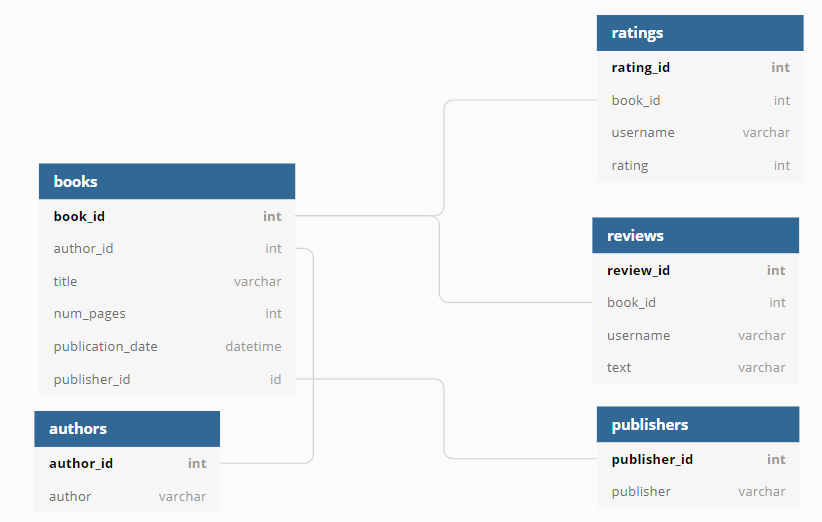

### Task

- Find the number of books released after January 1, 2000.
- Find the number of user reviews and the average rating for each book.
- Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).
- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
- Find the average number of text reviews among users who rated more than 50 books.

### Instructions for completing the task

- Describe the goals of the study.
- Study the tables (print the first rows).
- Make an SQL query for each of the tasks.
- Output the results of each query in the Notebook.
- Describe your conclusions for each of the tasks.

### Access to the data base

Follow the instructions on connecting to the data base.

[Copy of Connecting to the Data Base](https://www.notion.so/Copy-of-Connecting-to-the-Data-Base-4fd30b3fd56043e5a9aac27b607fb7a6)

### Notes

- Don't forget functions! They can make your life and running queries considerably easier.

- Your results must be obtained with SQL. Use pandas only to print and store query results.


# Step 1. Download the data

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [2]:
query = '''
         SELECT *
         FROM books
         LIMIT 5
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
query = '''
         SELECT *
         FROM authors
         LIMIT 5
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [4]:
query = '''
         SELECT *
         FROM publishers
         LIMIT 5
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [5]:
query = '''
         SELECT *
         FROM ratings
         LIMIT 5
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
query = '''
         SELECT *
         FROM reviews
         LIMIT 5
        '''

table = pd.io.sql.read_sql(query, con = engine)
table


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


# Step 2. Tasks

## Find the number of books released after January 1, 2000.

In [7]:
query = '''
         SELECT COUNT(book_id)
         FROM books
         WHERE publication_date > '2000-01-01';
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,count
0,819


**819 books released after January 1, 2000**


##  Find the number of user reviews and the average rating for each book.

In [8]:
query = '''
         SELECT b.title,
                COUNT(DISTINCT review_id) AS review_id,
                AVG(rating) AS rating
         FROM books AS b
         LEFT JOIN ratings AS rt ON rt.book_id = b.book_id
         LEFT JOIN reviews AS rv ON rv.book_id = b.book_id
         GROUP BY b.book_id
         ORDER BY review_id DESC, rating DESC
         '''

table = pd.io.sql.read_sql(query, con = engine)
table

,title,review_id,rating
0,Twilight (Twilight #1),7,3.662500
1,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
3,The Book Thief,6,4.264151
4,The Glass Castle,6,4.206897
...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
996,Leonardo's Notebooks,0,4.000000
997,Essential Tales and Poems,0,4.000000
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667


- The maximum number of reviews is 7, the minimum number of reviews is 0.
- The maximum rating is 5, the minimum rating is 1.5.
- The maximum number of user reviews for the Twilight book, and its rating is 3.66.
- The minimum rating of 1.5 for the book Harvesting the Heart, it has 2 user reviews.


## Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [9]:
query = '''
         SELECT publisher,
                count(b.book_id)
         FROM books AS b
         LEFT JOIN publishers AS pub ON pub.publisher_id = b.publisher_id
         WHERE num_pages > 50
         GROUP BY publisher
         ORDER BY count DESC
         LIMIT 1
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,publisher,count
0,Penguin Books,42


**Penguin Books has published the most books with 42 books.**



## Identify the author with the highest average book rating (look only at books with at least 50 ratings).

In [10]:
query = '''
         SELECT au.author, 
                AVG(avg_rating) AS rating
         FROM authors AS au
         JOIN books AS b ON b.author_id = au.author_id
         JOIN(
             SELECT b.book_id, 
                    b.title, 
                    COUNT(rating_id) AS number_of_ratings, 
                    AVG (rating) AS avg_rating
             FROM books AS b
             JOIN ratings ON ratings.book_id = b.book_id
             GROUP BY b.book_id, b.title) AS subq ON subq.book_id = b.book_id
         WHERE number_of_ratings >= 50
         GROUP BY au.author_id, au.author
         ORDER BY rating DESC
         LIMIT 1
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,author,rating
0,J.K. Rowling/Mary GrandPré,4.283844


**The author with the highest average book rating в 4.28 это J.K. Rowling/Mary GrandPré.***


## Find the average number of text reviews among users who rated more than 50 books. 

In [11]:
query = '''
        SELECT AVG(COUNT) AS avg_number_of_reviews    
        FROM
            (SELECT COUNT(text)
             FROM reviews
             LEFT JOIN 
                 (SELECT username, 
                         COUNT(rating_id) as rt 
                  FROM ratings 
                  GROUP BY username) 
                         AS rating ON rating.username = reviews.username 
                  WHERE rt > 50
                  GROUP BY reviews.username) as COUNT; 
        '''

table = pd.io.sql.read_sql(query, con = engine)
table

,avg_number_of_reviews
0,24.333333


**The average number of text reviews among users who have rated more than 50 books is 24 reviews.**
